# Bank Fraud Detection
Authors: Alec Beland, (Add your names here)

## Introduction

Insert intro here

## Exploratory Analysis

In [2]:
# Loading Cleaned Data Set and Imports
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_Fraud.csv")

### Fraudrate by Age Group

/var/folders/qg/srxn59qj5bq_6yr1wpwn8rnr0000gp/T/ipykernel_1811/2967771250.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_age = df.groupby('Age_Group')['Is_Fraud'].mean() * 100  # convert to percentage


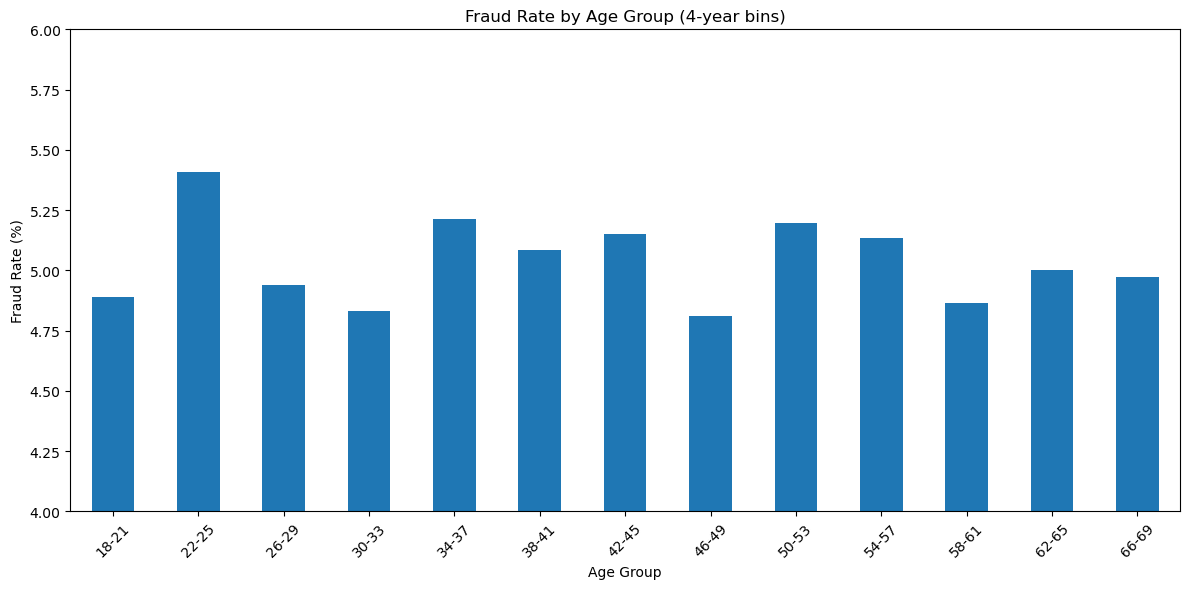

In [10]:
# Create 4-year bins from 18 to 70
bins = list(range(18, 71, 4))  # 18, 22, 26, ..., 66, 70
labels = [f'{i}-{i+3}' for i in bins[:-1]]

# Cut the Age column into those bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate fraud rate per age group
fraud_rate_by_age = df.groupby('Age_Group')['Is_Fraud'].mean() * 100  # convert to percentage

# Plot the fraud rate
plt.figure(figsize=(12, 6))
fraud_rate_by_age.plot(kind='bar')

plt.title('Fraud Rate by Age Group (4-year bins)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Age Group')
plt.ylim(4,6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Fraud Rate by Age Group Summary

This bar chart visualizes the percentage of fraudulent transactions across 4-year age intervals:

- Fraud rates generally range between **4.5% and 5.5%**.
- Slight peaks are seen in the **22–25**, **34–37**, and **50–53** age groups.
- No strong correlation is observed between age and fraud rate, suggesting that **age alone may not be a reliable predictor of fraud**.



### Fraud by State (Ordered by Income)

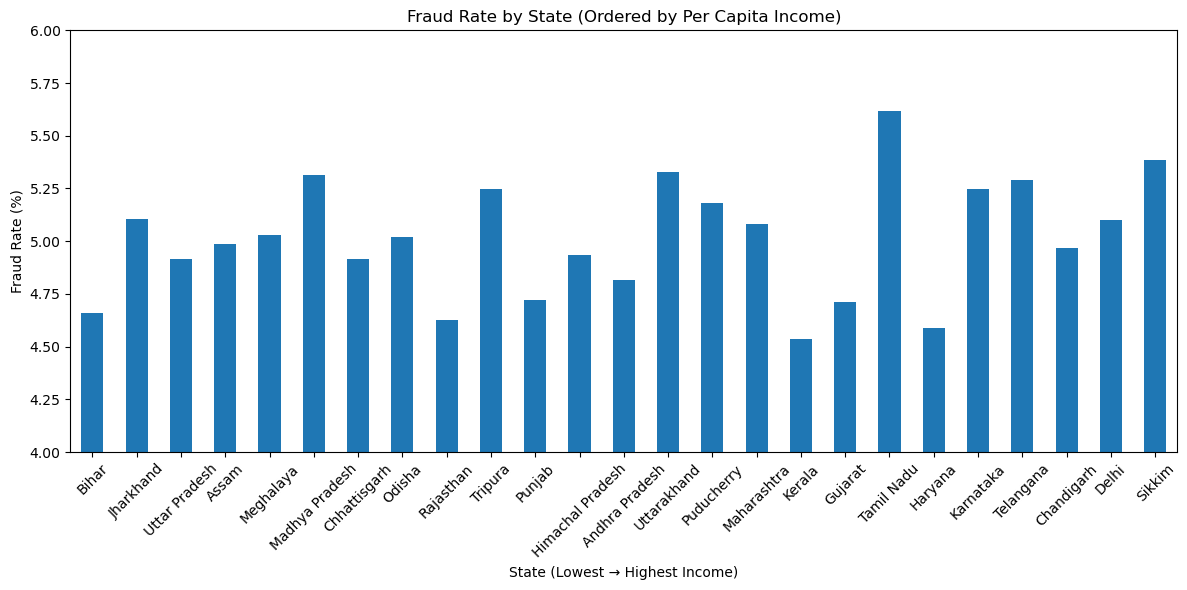

In [8]:
# Manually create a dictionary of per capita income by state (₹)
income_data = {
    'Bihar': 60337,
    'Jharkhand': 105274,
    'Uttar Pradesh': 114514,
    'Assam': 135787,
    'Meghalaya': 136948,
    'Jammu and Kashmir': 142138,
    'Madhya Pradesh': 142565,
    'Chhattisgarh': 147361,
    'Odisha': 163101,
    'Rajasthan': 167964,
    'Tripura': 177723,
    'Punjab': 196505,
    'Himachal Pradesh': 235199,
    'Andhra Pradesh': 242479,
    'Uttarakhand': 260201,
    'Puducherry': 262166,
    'Maharashtra': 277603,
    'Kerala': 281001,
    'Gujarat': 297722,
    'Tamil Nadu': 315220,
    'Haryana': 325759,
    'Karnataka': 332926,
    'Telangana': 356564,
    'Chandigarh': 399654,
    'Delhi': 461910,
    'Sikkim': 587743,
}

# Convert to DataFrame
income_df = pd.DataFrame.from_dict(income_data, orient='index', columns=['Per_Capita_Income'])

# Join with fraud rate by state
fraud_rate_by_state = df.groupby('State')['Is_Fraud'].mean() * 100  # percentage
fraud_and_income = pd.concat([fraud_rate_by_state, income_df], axis=1).dropna()

# Sort by income (poorest to richest)
fraud_and_income_sorted = fraud_and_income.sort_values(by='Per_Capita_Income')

# Plot fraud rate by state ordered by income
plt.figure(figsize=(12, 6))
fraud_and_income_sorted['Is_Fraud'].plot(kind='bar')

plt.title('Fraud Rate by State (Ordered by Per Capita Income)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('State (Lowest → Highest Income)')
plt.ylim(4, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Fraud Rate by State (Ordered by Per Capita Income) Summary

This bar chart shows the fraud rate by state, ordered from **lowest to highest per capita income**:

- States like **Sikkim**, **Delhi**, and **Tamil Nadu** show some of the **highest fraud rates**, despite having higher income levels.
- States like **Bihar**, **Odisha**, and **Kerala** show **lower fraud rates**, even with lower average incomes.
- Overall, there is **no clear relationship between income level and fraud rate**, suggesting that **factors beyond economic status** may be driving fraud trends.



### Fraud Rate by Gender 

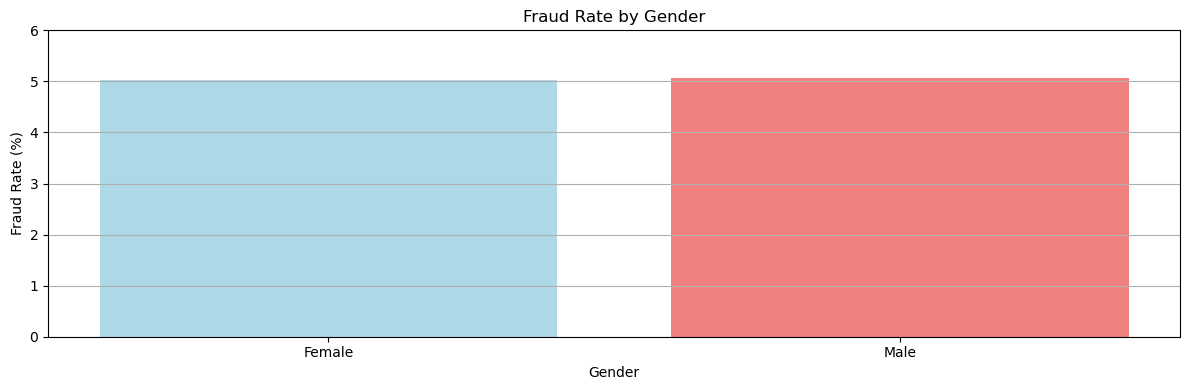

In [12]:
# Calculate fraud rate by gender
fraud_by_gender = df.groupby("Gender")["Is_Fraud"].mean() * 100  # convert to %

# Plot
plt.figure(figsize=(12, 4))
plt.bar(fraud_by_gender.index, fraud_by_gender.values, color=["lightblue", "lightcoral"])
plt.title("Fraud Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Rate (%)")
plt.ylim(0, 6)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### Fraud Rate by Gender Summary

This bar chart displays the percentage of fraudulent transactions for each gender.

- The fraud rate is nearly identical between **females** and **males**, both around **5%**.
- Based on the second chart (transaction count by gender), the **total number of transactions is roughly the same** for both genders.
- This suggests that **gender does not appear to be a significant factor** in predicting fraud rate within this dataset.


## Machine Learning

To be done in future... will be using (MLR and XGB)

## Summary and Conclusions
Insert summary here

## Limitations and Recommendations for future work.
Insert here